In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrangle_fitbit as wf
import seaborn as sns
import csv
from sklearn import metrics
from math import sqrt

In [2]:
df = wf.get_activities_data(splain=True)

DATAFRAME SHAPE:
(225, 15)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 15 columns):
cals_burned          225 non-null float64
steps                225 non-null float64
dist                 225 non-null float64
flrs                 225 non-null float64
mins_sed             225 non-null float64
mins_light           225 non-null float64
mins_mod             225 non-null float64
mins_heavy           225 non-null float64
activity_cals        225 non-null float64
mins_tot             225 non-null float64
mins_off             225 non-null float64
week_day             225 non-null object
cals_idle            225 non-null float64
mins_idle            225 non-null float64
idle_cals_per_min    225 non-null float64
dtypes: float64(14), object(1)
memory usage: 28.1+ KB
None

DATAFRAME DESCRIPTION:
                   count         mean          std         min          25%  \
cals_burned        225.0  3401.911111   6

In [71]:
df

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
date,,,,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,4-Thu,2069.0,1347.0,1.536006,NaN,NaN,NaN
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,0.0,5-Fri,1897.0,1158.0,1.638169,NaN,NaN,NaN
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,550.0,6-Sat,2255.0,1252.0,1.801118,NaN,NaN,NaN
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,427.0,0-Sun,2249.0,1318.0,1.706373,NaN,NaN,NaN
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,456.0,1-Mon,2285.0,1336.0,1.710329,NaN,NaN,NaN
2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0,1101.0,339.0,2-Tue,2224.0,1258.0,1.767886,NaN,NaN,NaN
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,423.0,3-Wed,2241.0,1350.0,1.660000,NaN,NaN,NaN
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,4-Thu,2115.0,1267.0,1.669298,486.0,2635.0,486.0
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,5-Fri,2253.0,1379.0,1.633793,-1127.0,3649.0,-1127.0


In [ ]:
df.describe().T

In [46]:
def split_store_data(df, train_prop=.66): 
    train_size = int(len(df) * train_prop)
    train, test = df[0:train_size], df[train_size:len(df)]
    return train, test

In [15]:
train.head(2)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,4-Thu,2069.0,1347.0,1.536006
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,0.0,5-Fri,1897.0,1158.0,1.638169


In [207]:
cor = df[['cals_burned','steps','activity_cals']].corr()

In [ ]:
sns.heatmap(cor)

In [16]:
df[df.steps==0]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,,
2018-06-06,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,3-Wed,2145.0,1440.0,1.489583
2018-06-07,2146.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,4-Thu,2146.0,1440.0,1.490278
2018-06-11,2146.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,1-Mon,2146.0,1440.0,1.490278
2018-06-26,2144.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,2-Tue,2144.0,1440.0,1.488889
2018-06-27,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,3-Wed,2145.0,1440.0,1.489583
2018-06-28,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,4-Thu,2145.0,1440.0,1.489583
2018-06-29,2180.0,0.0,0.0,0.0,1437.0,3.0,0.0,0.0,39.0,1440.0,0.0,5-Fri,2141.0,1437.0,1.489910
2018-06-30,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,6-Sat,2145.0,1440.0,1.489583
2018-07-03,2144.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,2-Tue,2144.0,1440.0,1.488889


In [40]:
df['cal_diff_priorW'] = df.cals_burned.diff(7)
df['last_week_cals'] = df.cals_burned.shift(7)

In [41]:
3517-3044

473

In [42]:
dfzeros = df[df.steps == 0]

In [43]:
dfzeros

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
date,,,,,,,,,,,,,,,,,,
2018-06-06,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,3-Wed,2145.0,1440.0,1.489583,-1179.0,3324.0,-1179.0
2018-06-07,2146.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,4-Thu,2146.0,1440.0,1.490278,-1274.0,3420.0,-1274.0
2018-06-11,2146.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,1-Mon,2146.0,1440.0,1.490278,-1439.0,3585.0,-1439.0
2018-06-26,2144.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,2-Tue,2144.0,1440.0,1.488889,-1416.0,3560.0,-1416.0
2018-06-27,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,3-Wed,2145.0,1440.0,1.489583,-1111.0,3256.0,-1111.0
2018-06-28,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,4-Thu,2145.0,1440.0,1.489583,-1285.0,3430.0,-1285.0
2018-06-29,2180.0,0.0,0.0,0.0,1437.0,3.0,0.0,0.0,39.0,1440.0,0.0,5-Fri,2141.0,1437.0,1.489910,-1110.0,3290.0,-1110.0
2018-06-30,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,6-Sat,2145.0,1440.0,1.489583,-989.0,3134.0,-989.0
2018-07-03,2144.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,2-Tue,2144.0,1440.0,1.488889,0.0,2144.0,0.0


In [23]:
train[['cals_burned','pred_cal_burned']].tail(10)

,cals_burned,pred_cal_burned
date,,
2018-09-11,2824.0,-377.0
2018-09-12,3047.0,-348.0
2018-09-13,3044.0,137.0
2018-09-14,3080.0,-749.0
2018-09-15,3180.0,-851.0
2018-09-16,3344.0,-338.0
2018-09-17,2952.0,-25.0
2018-09-18,2997.0,173.0
2018-09-19,3044.0,-3.0


In [18]:
print(df.index.max())
print(df.index.min())

2018-12-06 00:00:00
2018-04-26 00:00:00


In [ ]:
pd.plotting.lag_plot(train.pred_cal_burned.resample('W').mean(),lag=1)

In [ ]:
df.dtypes

In [ ]:
train['pred_cal_burned'] = train.cals_burned.diff(7)

In [ ]:
plt.figure(figsize=(9,7))
cal_resid = train.reset_index()
cal_resid.plot(x='date',y='cals_burned')
plt.scatter(cal_resid.date,cal_resid.pred_cal_burned,c='firebrick',marker='+',alpha=.7)

In [ ]:
train.tail()

In [45]:
train.tail()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned
date,,,,,,,,,,,,,,,,
2018-09-16,3344.0,9015.0,4.25,102.0,586.0,184.0,30.0,38.0,1494.0,838.0,602.0,0-Sun,1850.0,1188.0,1.557239,-338.0
2018-09-17,2952.0,5628.0,2.65,2.0,990.0,134.0,24.0,13.0,985.0,1161.0,279.0,1-Mon,1967.0,1269.0,1.550039,-25.0
2018-09-18,2997.0,6247.0,2.95,11.0,866.0,196.0,1.0,11.0,1074.0,1074.0,366.0,2-Tue,1923.0,1232.0,1.560877,173.0
2018-09-19,3044.0,7034.0,3.32,14.0,768.0,218.0,2.0,8.0,1195.0,996.0,444.0,3-Wed,1849.0,1212.0,1.525578,-3.0
2018-09-20,3517.0,9920.0,4.68,8.0,844.0,156.0,10.0,56.0,1565.0,1066.0,374.0,4-Thu,1952.0,1218.0,1.602627,473.0


In [ ]:
test_df

In [ ]:
def plot_and_eval(target_vars, train = train, test = test, metric_fmt = '{:.2f}', linewidth = 4):
    if type(target_vars) is not list:
        target_vars = [target_vars]

    plt.figure(figsize=(16, 8))
    plt.plot(train[target_vars],label='Train', linewidth=1)
    plt.plot(test[target_vars], label='Test', linewidth=1)

    for var in target_vars:
        mse, rmse = evaluate(target_var = var, train = train, test = test, output=False)
        plt.plot(yhat[var], linewidth=linewidth)
        print(f'{var} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse))

    plt.show()

In [52]:
def append_eval_df(model_type, target_vars, train = train, test = test):
    temp_eval_df = pd.concat([pd.DataFrame([[model_type, i, 'mse', evaluate(target_var = i, 
                                                                            train = train, 
                                                                            test = test, 
                                                                            output=False)[0]],
                                            [model_type, i, 'rmse', evaluate(target_var = i, 
                                                                             train = train, 
                                                                             test = test, 
                                                                             output=False)[1]]],
                                           columns=['model_type', 'target_var', 'metric', 'value']) 
                              for i in target_vars], ignore_index=True)
    return eval_df.append(temp_eval_df, ignore_index=True)

In [50]:
target_vars=['cals_burned']

In [47]:
train,test = split_store_data(df)

In [51]:
eval_df = pd.DataFrame(columns=['model_type','target_var','metric','value'])

In [53]:
yhat = pd.DataFrame(test[target_vars])

In [56]:
train['avg_cals_burned'] = train.cals_burned.mean()

In [66]:
score_train = train[train.last_week_cals >0]
score_train.head()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW,avg_cals_burned
date,,,,,,,,,,,,,,,,,,,
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,4-Thu,2115.0,1267.0,1.669298,486.0,2635.0,486.0,3271.871622
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,5-Fri,2253.0,1379.0,1.633793,-1127.0,3649.0,-1127.0,3271.871622
2018-05-05,2551.0,833.0,0.39,0.0,969.0,68.0,0.0,0.0,326.0,1037.0,403.0,6-Sat,2225.0,1372.0,1.621720,-828.0,3379.0,-828.0,3271.871622
2018-05-06,2771.0,1383.0,0.65,0.0,976.0,103.0,0.0,0.0,506.0,1079.0,361.0,0-Sun,2265.0,1337.0,1.694091,-80.0,2851.0,-80.0,3271.871622
2018-05-07,2524.0,952.0,0.45,0.0,907.0,63.0,0.0,0.0,283.0,970.0,470.0,1-Mon,2241.0,1377.0,1.627451,-301.0,2825.0,-301.0,3271.871622


In [67]:
rms_mean = sqrt(metrics.mean_squared_error(score_train.cals_burned,score_train.avg_cals_burned))

In [68]:
rms

650.7595487395853

In [69]:
rms_prior_week = sqrt(metrics.mean_squared_error(score_train.cals_burned,score_train.last_week_cals))

In [70]:
rms_prior_week

860.6324863701955

In [73]:
df.columns

Index(['cals_burned', 'steps', 'dist', 'flrs', 'mins_sed', 'mins_light',
       'mins_mod', 'mins_heavy', 'activity_cals', 'mins_tot', 'mins_off',
       'week_day', 'cals_idle', 'mins_idle', 'idle_cals_per_min',
       'pred_cal_burned', 'last_week_cals', 'cal_diff_priorW'],
      dtype='object')

In [76]:
df.head(2)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
date,,,,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,4-Thu,2069.0,1347.0,1.536006,NaN,NaN,NaN
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,0.0,5-Fri,1897.0,1158.0,1.638169,NaN,NaN,NaN


In [145]:
df_early = df[(df.steps > 0) & (df.index < '2018-07-07')]

In [84]:
df_early.drop(columns='week_day',inplace=True)


In [100]:
df_early.describe().loc[['mean']]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
mean,3153.533333,4542.066667,2.142167,2.783333,900.333333,170.033333,12.166667,6.95,1066.433333,1089.483333,350.516667,2087.1,1250.85,1.670615,86.132075,3082.188679,86.132075


In [92]:
avg_col = []
for col in df_early:
    avg_col.append(col)

In [101]:
df_

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
date,,,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,2069.0,1347.0,1.536006,NaN,NaN,NaN
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,0.0,1897.0,1158.0,1.638169,NaN,NaN,NaN
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,550.0,2255.0,1252.0,1.801118,NaN,NaN,NaN
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,427.0,2249.0,1318.0,1.706373,NaN,NaN,NaN
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,456.0,2285.0,1336.0,1.710329,NaN,NaN,NaN
2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0,1101.0,339.0,2224.0,1258.0,1.767886,NaN,NaN,NaN
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,423.0,2241.0,1350.0,1.660000,NaN,NaN,NaN
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,2115.0,1267.0,1.669298,486.0,2635.0,486.0
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,2253.0,1379.0,1.633793,-1127.0,3649.0,-1127.0


In [141]:
df_missing = df[(df.steps == 0)]
#df_missing.drop(columns='week_day',inplace=True)

In [113]:
df_missing['steps'] = df_missing['steps'].fillna(df_early.steps.mean())

In [132]:
df_missing['steps'] = round(df_early.steps.mean())

In [146]:
df_early.groupby('week_day').mean()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
week_day,,,,,,,,,,,,,,,,,
0-Sun,3128.100000,4235.500000,1.997000,2.600000,864.300000,173.000000,11.200000,6.100000,1048.900000,1054.600000,385.400000,2079.200000,1249.700000,1.663447,26.555556,3132.333333,26.555556
1-Mon,2982.000000,3353.555556,1.582222,1.444444,872.000000,141.777778,7.555556,1.555556,822.000000,1022.888889,417.111111,2160.000000,1289.111111,1.679241,102.250000,2899.375000,102.250000
2-Tue,3272.875000,4285.625000,2.022500,1.250000,895.500000,184.375000,15.750000,2.500000,1142.375000,1098.125000,341.875000,2130.500000,1237.375000,1.723853,38.285714,3231.857143,38.285714
3-Wed,3142.428571,4527.428571,2.134286,1.142857,1031.428571,177.714286,10.142857,4.428571,1056.571429,1223.714286,216.285714,2085.857143,1247.714286,1.677692,295.833333,2927.000000,295.833333
4-Thu,3130.250000,4344.000000,2.047500,2.875000,896.125000,179.875000,8.250000,1.750000,1067.125000,1086.000000,354.000000,2063.125000,1250.125000,1.652314,295.571429,2905.428571,295.571429
5-Fri,3260.222222,6099.111111,2.876667,5.222222,949.222222,177.888889,18.666667,15.666667,1244.888889,1161.444444,278.555556,2015.333333,1227.777778,1.643188,-44.875000,3256.500000,-44.875000
6-Sat,3169.888889,4929.555556,2.325556,4.444444,825.888889,159.666667,13.222222,15.111111,1091.444444,1013.888889,426.111111,2078.444444,1252.000000,1.660823,-30.625000,3174.375000,-30.625000


In [154]:
def predict_missing(df):
    df_early = df[(df.steps > 0) & (df.index < '2018-07-07')]
    df_missing = df[df.steps == 0]
    df_early.drop(columns='week_day',inplace=True)
    df_missing.drop(columns='week_day',inplace=True)

    for col in df_missing.columns:
        df_mean = df_early

        df_missing[col]= round(df_mean[col].mean())
    export_csv = df_missing.to_csv(r'missing_data_predicted.csv',header=True)

In [156]:
predict_missing(df)

In [157]:
df

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
date,,,,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,4-Thu,2069.0,1347.0,1.536006,NaN,NaN,NaN
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,0.0,5-Fri,1897.0,1158.0,1.638169,NaN,NaN,NaN
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,550.0,6-Sat,2255.0,1252.0,1.801118,NaN,NaN,NaN
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,427.0,0-Sun,2249.0,1318.0,1.706373,NaN,NaN,NaN
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,456.0,1-Mon,2285.0,1336.0,1.710329,NaN,NaN,NaN
2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0,1101.0,339.0,2-Tue,2224.0,1258.0,1.767886,NaN,NaN,NaN
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,423.0,3-Wed,2241.0,1350.0,1.660000,NaN,NaN,NaN
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,4-Thu,2115.0,1267.0,1.669298,486.0,2635.0,486.0
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,5-Fri,2253.0,1379.0,1.633793,-1127.0,3649.0,-1127.0


In [169]:
df['dist_ft'] = df.dist * 5280
df['stride'] = df.dist_ft / df.steps

In [170]:
df

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,...,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW,stride,dist_km,dist_ft
date,,,,,,,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,...,4-Thu,2069.0,1347.0,1.536006,NaN,NaN,NaN,2.485977,1380.0,7286.4
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,...,5-Fri,1897.0,1158.0,1.638169,NaN,NaN,NaN,2.488818,4700.0,24816.0
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,...,6-Sat,2255.0,1252.0,1.801118,NaN,NaN,NaN,2.489293,1660.0,8764.8
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,...,0-Sun,2249.0,1318.0,1.706373,NaN,NaN,NaN,2.480537,770.0,4065.6
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,...,1-Mon,2285.0,1336.0,1.710329,NaN,NaN,NaN,2.474376,620.0,3273.6
2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0,1101.0,...,2-Tue,2224.0,1258.0,1.767886,NaN,NaN,NaN,2.495777,1220.0,6441.6
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,...,3-Wed,2241.0,1350.0,1.660000,NaN,NaN,NaN,2.501458,650.0,3432.0
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,...,4-Thu,2115.0,1267.0,1.669298,486.0,2635.0,486.0,2.483871,1050.0,5544.0
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,...,5-Fri,2253.0,1379.0,1.633793,-1127.0,3649.0,-1127.0,2.511504,430.0,2270.4


In [171]:
from statsmodels.tsa.api import Holt

In [173]:
train.tail(2)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW,avg_cals_burned
date,,,,,,,,,,,,,,,,,,,
2018-09-19,3044.0,7034.0,3.32,14.0,768.0,218.0,2.0,8.0,1195.0,996.0,444.0,3-Wed,1849.0,1212.0,1.525578,-3.0,3047.0,-3.0,3271.871622
2018-09-20,3517.0,9920.0,4.68,8.0,844.0,156.0,10.0,56.0,1565.0,1066.0,374.0,4-Thu,1952.0,1218.0,1.602627,473.0,3044.0,473.0,3271.871622


In [176]:
model = Holt(train.cals_burned).fit(smoothing_level=.3,smoothing_slope=.1,optimized=False)

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [179]:
yhat['cals_burned'] = pd.DataFrame(model.forecast(test['cals_burned'].shape[0]))

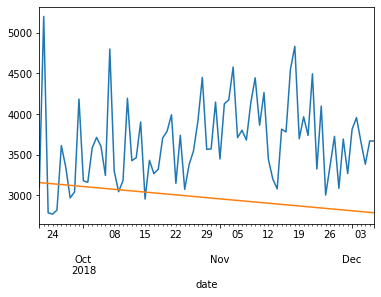

In [182]:
test.cals_burned.plot()
yhat.cals_burned.plot()
plt.show()

In [185]:
df_new = df


In [186]:
df_new.steps = np.where(df.steps == 0,df_missing.steps.mean(),df.steps)

In [190]:
def predict_missing(df):
    df_early = df[(df.steps > 0) & (df.index < '2018-07-07')]
    df_missing = df[df.steps == 0]
    df_early.drop(columns='week_day',inplace=True)
    df_missing.drop(columns='week_day',inplace=True)

    for col in df_missing.columns:
        df_mean = df_early

        df_missing[col]= round(df_mean[col].mean())
    export_csv = df_missing.to_csv(r'missing_data_predicted.csv',header=True)

In [196]:
df_late = df[df.index > '2018-07-07']

In [205]:
df_late.describe().loc[['mean']]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW,stride,dist_km,dist_ft
mean,3599.493421,10798.309211,5.123684,17.513158,722.355263,210.605263,16.940789,47.302632,1767.480263,997.203947,442.796053,1832.013158,1165.151316,1.574589,54.138158,3545.355263,54.138158,2.501242,5123.684211,27053.052632


In [204]:
df_early.describe().loc[['mean']]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,pred_cal_burned,last_week_cals,cal_diff_priorW
mean,3153.533333,4542.066667,2.142167,2.783333,900.333333,170.033333,12.166667,6.95,1066.433333,1089.483333,350.516667,2087.1,1250.85,1.670615,86.132075,3082.188679,86.132075
